In [3]:
import sys
sys.path.append('./libs')
import util_modelo_referencial, util_bd, util_fasta
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
from sklearn.externals.joblib import Parallel, delayed
from sklearn.externals.joblib import load

#limpieza
if os.path.isdir("./data"):
    shutil.rmtree("./data")
os.mkdir("./data")
if os.path.isdir("./CPAT"):
    shutil.rmtree("./CPAT")
if os.path.isdir("./Diamond"):
    shutil.rmtree("./Diamond")
if os.path.isdir("./features"):
    shutil.rmtree("./features")
    
def generar_data_especie(row_especie):
    id_especie = str(row_especie[0])
    # lncRNA
    query = "SELECT cod_secuencia, secuencia FROM secuencias WHERE flg_pct = 0 AND flg_seleccionado = 1 AND id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".lncRNA.fasta")
    # PCT
    query = "SELECT cod_secuencia, secuencia FROM secuencias WHERE flg_pct = 1 AND flg_seleccionado = 1 AND id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".PCT.fasta")
    # CDS
    query = "SELECT f.cod_secuencia, cds.coding FROM secuencias_CDS cds JOIN secuencias_features f ON cds.id_especie = f.id_especie AND cds.cod_secuencia = f.cod_secuencia WHERE f.flg_pct = 1 AND f.flg_seleccionado = 1 AND f.id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".CDS.fasta")
        
def generar_modelo_especie(row_especie):
    scores = [['accuracy','precision','recall']]
    id_especie = row_especie[0]
    identificador = "Especie{}".format(id_especie)
    tuned_parameters = [{'svc__kernel': ['rbf'], 'svc__gamma': [1e-3], 'svc__C': [0.1,0.5,0.9,2], 'features__identificador': [identificador]}]
    util_modelo_referencial.crear_modelo_referencial(identificador, tuned_parameters, scores, n_jobs=1, cv=10)

def proceso_especie(row_especie):
    generar_data_especie(row_especie)
    generar_modelo_especie(row_especie)

def obtener_especies():
    query = "SELECT m.id_especie, m.especie FROM especies_seleccionadas s JOIN maestra_especies m ON s.especie = m.especie ORDER BY id_especie"
    especies = util_bd.resultados_query(query)
    for especie in especies:
        if not os.path.isfile("./modelos_referenciales/modelo_Especie{}.plk".format(especie[0])):
            yield especie

print("Iniciando proceso...")

#ejecución paralela de los modelos para las 30 especies
Parallel(n_jobs=4, verbose=100)(delayed(proceso_especie)(row_especie) for row_especie in obtener_especies())

#limpieza - excepto la carpeta de modelos generados
if os.path.isdir("./data"):
    shutil.rmtree("./data")
if os.path.isdir("./CPAT"):
    shutil.rmtree("./CPAT")
if os.path.isdir("./Diamond"):
    shutil.rmtree("./Diamond")
if os.path.isdir("./features"):
    shutil.rmtree("./features")

#resultados
query = "SELECT m.id_especie, m.especie FROM especies_seleccionadas s JOIN maestra_especies m ON s.especie = m.especie ORDER BY id_especie"
especies = util_bd.resultados_query(query)
for especie in especies:
    id_especie = especie[0]
    identificador = "Especie{}".format(id_especie)
    print(load('./modelos_referenciales/resultado_{}.bin'.format(identificador)))
    
print("Proceso terminado...")

Iniciando proceso...
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed: 98.0min
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed: 108.5min
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed: 144.7min
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed: 149.7min
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed: 190.9min
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed: 198.5min
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed: 247.4min
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed: 263.5min
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed: 312.6min
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed: 340.0min
[Parallel(n_jobs=4)]: Done  11 tasks      | elapsed: 378.1min
[Parallel(n_jobs=4)]: Done  12 tasks      | elapsed: 423.1min
[Parallel(n_jobs=4)]: Done  13 tasks      | elapsed: 455.1min
[Parallel(n_jobs=4)]: Done  14 tasks      | elapsed: 477.0min
[Parallel(n_jobs=4)]: Done  15 tasks 

KeyboardInterrupt: 

In [1]:
import sys
sys.path.append('./libs')
import util_modelo_referencial, util_bd, util_fasta
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
from sklearn.externals.joblib import Parallel, delayed
from sklearn.externals.joblib import load

#limpieza
if os.path.isdir("./data"):
    shutil.rmtree("./data")
os.mkdir("./data")
if os.path.isdir("./CPAT"):
    shutil.rmtree("./CPAT")
if os.path.isdir("./Diamond"):
    shutil.rmtree("./Diamond")
if os.path.isdir("./features"):
    shutil.rmtree("./features")
    
def generar_data_especie(row_especie):
    id_especie = str(row_especie[0])
    # lncRNA
    query = "SELECT cod_secuencia, secuencia FROM secuencias WHERE flg_pct = 0 AND flg_seleccionado = 1 AND id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".lncRNA.fasta")
    # PCT
    query = "SELECT cod_secuencia, secuencia FROM secuencias WHERE flg_pct = 1 AND flg_seleccionado = 1 AND id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".PCT.fasta")
    # CDS
    query = "SELECT f.cod_secuencia, cds.coding FROM secuencias_CDS cds JOIN secuencias_features f ON cds.id_especie = f.id_especie AND cds.cod_secuencia = f.cod_secuencia WHERE f.flg_pct = 1 AND f.flg_seleccionado = 1 AND f.id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".CDS.fasta")
        
def generar_modelo_especie(row_especie):
    scores = [['accuracy','precision','recall']]
    id_especie = row_especie[0]
    identificador = "Especie{}".format(id_especie)
    tuned_parameters = [{'svc__kernel': ['rbf'], 'svc__gamma': [1e-3], 'svc__C': [0.1,0.5,0.9,2], 'features__identificador': [identificador]}]
    util_modelo_referencial.crear_modelo_referencial(identificador, tuned_parameters, scores, n_jobs=1, cv=10)

def proceso_especie(row_especie):
    generar_data_especie(row_especie)
    generar_modelo_especie(row_especie)

def obtener_especies():
    query = "SELECT m.id_especie, m.especie FROM especies_seleccionadas s JOIN maestra_especies m ON s.especie = m.especie ORDER BY id_especie"
    especies = util_bd.resultados_query(query)
    for especie in especies:
        if not os.path.isfile("./modelos_referenciales/modelo_Especie{}.plk".format(especie[0])):
            yield especie

print("Iniciando proceso...")

#ejecución paralela de los modelos para las 30 especies
Parallel(n_jobs=3, verbose=100)(delayed(proceso_especie)(row_especie) for row_especie in obtener_especies())

#limpieza - excepto la carpeta de modelos generados
if os.path.isdir("./data"):
    shutil.rmtree("./data")
if os.path.isdir("./CPAT"):
    shutil.rmtree("./CPAT")
if os.path.isdir("./Diamond"):
    shutil.rmtree("./Diamond")
if os.path.isdir("./features"):
    shutil.rmtree("./features")

#resultados
query = "SELECT m.id_especie, m.especie FROM especies_seleccionadas s JOIN maestra_especies m ON s.especie = m.especie ORDER BY id_especie"
especies = util_bd.resultados_query(query)
for especie in especies:
    id_especie = especie[0]
    identificador = "Especie{}".format(id_especie)
    print(load('./modelos_referenciales/resultado_{}.bin'.format(identificador)))
    
print("Proceso terminado...")

Iniciando proceso...
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   1 tasks      | elapsed: 84.7min
[Parallel(n_jobs=3)]: Done   2 tasks      | elapsed: 100.1min
[Parallel(n_jobs=3)]: Done   3 tasks      | elapsed: 111.3min
[Parallel(n_jobs=3)]: Done   4 tasks      | elapsed: 186.5min
[Parallel(n_jobs=3)]: Done   5 tasks      | elapsed: 190.3min
[Parallel(n_jobs=3)]: Done   6 tasks      | elapsed: 216.2min
[Parallel(n_jobs=3)]: Done   7 tasks      | elapsed: 272.8min
[Parallel(n_jobs=3)]: Done   8 tasks      | elapsed: 281.4min
[Parallel(n_jobs=3)]: Done   9 tasks      | elapsed: 318.2min
[Parallel(n_jobs=3)]: Done  10 tasks      | elapsed: 364.7min
[Parallel(n_jobs=3)]: Done  11 out of  15 | elapsed: 388.4min remaining: 141.2min
[Parallel(n_jobs=3)]: Done  12 out of  15 | elapsed: 433.7min remaining: 108.4min
[Parallel(n_jobs=3)]: Done  13 out of  15 | elapsed: 456.9min remaining: 70.3min
[Parallel(n_jobs=3)]: Done  15 out of  1

In [2]:
import sys
sys.path.append('./libs')
import util_modelo_referencial, util_bd, util_fasta
import warnings
warnings.filterwarnings("ignore")
import os
import shutil
from sklearn.externals.joblib import Parallel, delayed
from sklearn.externals.joblib import load

#limpieza
if os.path.isdir("./data"):
    shutil.rmtree("./data")
os.mkdir("./data")
if os.path.isdir("./CPAT"):
    shutil.rmtree("./CPAT")
if os.path.isdir("./Diamond"):
    shutil.rmtree("./Diamond")
if os.path.isdir("./features"):
    shutil.rmtree("./features")
    
def generar_data_especie(row_especie):
    id_especie = str(row_especie[0])
    # lncRNA
    query = "SELECT cod_secuencia, secuencia FROM secuencias WHERE flg_pct = 0 AND flg_seleccionado = 1 AND id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".lncRNA.fasta")
    # PCT
    query = "SELECT cod_secuencia, secuencia FROM secuencias WHERE flg_pct = 1 AND flg_seleccionado = 1 AND id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".PCT.fasta")
    # CDS
    query = "SELECT f.cod_secuencia, cds.coding FROM secuencias_CDS cds JOIN secuencias_features f ON cds.id_especie = f.id_especie AND cds.cod_secuencia = f.cod_secuencia WHERE f.flg_pct = 1 AND f.flg_seleccionado = 1 AND f.id_especie = " + id_especie
    secuencias = util_bd.resultados_query(query)
    util_fasta.generar_fasta(secuencias, "./data/Especie" + id_especie + ".CDS.fasta")
        
def generar_modelo_especie(row_especie):
    scores = [['accuracy','precision','recall']]
    id_especie = row_especie[0]
    identificador = "Especie{}".format(id_especie)
    tuned_parameters = [{'svc__kernel': ['rbf'], 'svc__gamma': [1e-3], 'svc__C': [0.1,0.5,0.9,2], 'features__identificador': [identificador]}]
    util_modelo_referencial.crear_modelo_referencial(identificador, tuned_parameters, scores, n_jobs=1, cv=10)

def proceso_especie(row_especie):
    generar_data_especie(row_especie)
    generar_modelo_especie(row_especie)

def obtener_especies():
    query = "SELECT m.id_especie, m.especie FROM especies_seleccionadas s JOIN maestra_especies m ON s.especie = m.especie ORDER BY id_especie"
    especies = util_bd.resultados_query(query)
    for especie in especies:
        if not os.path.isfile("./modelos_referenciales/modelo_Especie{}.plk".format(especie[0])):
            yield especie

print("Iniciando proceso...")

#ejecución paralela de los modelos para las 30 especies
Parallel(n_jobs=5, verbose=100)(delayed(proceso_especie)(row_especie) for row_especie in obtener_especies())

#limpieza - excepto la carpeta de modelos generados
if os.path.isdir("./data"):
    shutil.rmtree("./data")
if os.path.isdir("./CPAT"):
    shutil.rmtree("./CPAT")
if os.path.isdir("./Diamond"):
    shutil.rmtree("./Diamond")
if os.path.isdir("./features"):
    shutil.rmtree("./features")

#resultados
query = "SELECT m.id_especie, m.especie FROM especies_seleccionadas s JOIN maestra_especies m ON s.especie = m.especie ORDER BY id_especie"
especies = util_bd.resultados_query(query)
for especie in especies:
    id_especie = especie[0]
    identificador = "Especie{}".format(id_especie)
    print(load('./modelos_referenciales/resultado_{}.bin'.format(identificador)))
    
print("Proceso terminado...")

Iniciando proceso...
[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   1 tasks      | elapsed: 119.5min
[Parallel(n_jobs=5)]: Done   2 tasks      | elapsed: 121.1min
[Parallel(n_jobs=5)]: Done   3 tasks      | elapsed: 135.7min
[Parallel(n_jobs=5)]: Done   4 tasks      | elapsed: 180.3min
[Parallel(n_jobs=5)]: Done   5 tasks      | elapsed: 188.0min
[Parallel(n_jobs=5)]: Done   6 tasks      | elapsed: 234.2min
[Parallel(n_jobs=5)]: Done   7 tasks      | elapsed: 252.5min
[Parallel(n_jobs=5)]: Done   8 tasks      | elapsed: 280.9min
[Parallel(n_jobs=5)]: Done   9 tasks      | elapsed: 335.6min
[Parallel(n_jobs=5)]: Done  10 tasks      | elapsed: 368.6min
[Parallel(n_jobs=5)]: Done  11 tasks      | elapsed: 401.5min
[Parallel(n_jobs=5)]: Done  12 tasks      | elapsed: 456.5min
[Parallel(n_jobs=5)]: Done  13 tasks      | elapsed: 463.5min
[Parallel(n_jobs=5)]: Done  14 tasks      | elapsed: 499.3min
[Parallel(n_jobs=5)]: Done  15 tasks

KeyboardInterrupt: 

Iniciando proceso...


,accuracy,precision,recall
especie,,,
Especie2,0.901616,0.857721,0.963403
Especie5,0.893061,0.896691,0.891635
Especie6,0.929183,0.930819,0.927519
Especie8,0.899596,0.887825,0.916112
Especie9,0.878089,0.868310,0.891397
Especie10,0.882605,0.874581,0.894011
Especie11,0.901141,0.908450,0.892586
Especie23,0.884981,0.883904,0.886407
Especie24,0.874525,0.864836,0.888546


,accuracy,precision,recall
count,30.000000,30.000000,30.000000
mean,0.899069,0.894054,0.906503
std,0.024186,0.027744,0.026310
min,0.839235,0.833151,0.851473
25%,0.887239,0.879735,0.889259
50%,0.897457,0.894529,0.905299
75%,0.914597,0.908447,0.926984
max,0.952947,0.956685,0.963403


Proceso terminado...
CPU times: user 114 ms, sys: 147 µs, total: 114 ms
Wall time: 114 ms


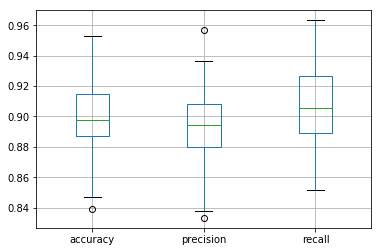

In [2]:
%%time
import sys
sys.path.append('./libs')
import util_bd
from sklearn.externals.joblib import load
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, HTML

print("Iniciando proceso...")

query = "SELECT m.id_especie, m.especie FROM especies_seleccionadas s JOIN maestra_especies m ON s.especie = m.especie"
especies = util_bd.resultados_query(query)
resultados = {}
for especie in especies:
    id_especie = especie[0]
    identificador = "Especie{}".format(id_especie)
    resultados[identificador] =  load('./modelos_referenciales/resultado_{}.bin'.format(identificador))

data = [[especie, datos['accuracy'], datos['precision'], datos['recall']]
        for especie, datos in resultados.items()]
df = pd.DataFrame(data, columns=['especie', 'accuracy', 'precision', 'recall']).set_index('especie')
    
#df = pd.DataFrame(resultados)
display(HTML(df.to_html()))
display(df.describe())

df.boxplot()

print("Proceso terminado...")